In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_or = pd.read_csv("LDS3 - De thi cucoi khoa K268/Breast Cancer WI.csv")

data = data_or.iloc[:, :-1] # Tách cột phân lớp ra riêng

nb_features = data.shape[1]
features    = data.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features))

* Số lượng features = 30
  Các features: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst


In [3]:
pca = PCA().fit(data)

Phương pháp ELBOW: Chọn k theo điểm gẫy trên đường cong


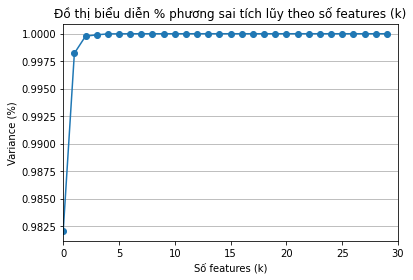

In [4]:
# 2.1) Vẽ biểu đồ phân tích phương sai tích lũy theo sự biến thiên của số chiều k.
# Dựa vào biểu đồ, chọn giá trị cho k để giảm chiều, với k > 2.
# Giải thích lý do đã chọn giá trị cho số chiều k.
print('Phương pháp ELBOW: Chọn k theo điểm gẫy trên đường cong')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features])
plt.grid(axis='y')
plt.show()
# Chọn k = 3 vì
# Tại k = 3, đường cong bị gãy, mức độ tăng của variance theo k gần như bằng 0 khi k>3
# Chỉ 3 thành phần đã giữ lại được >99.75% dữ liệu

In [5]:
# 2.2) Chọn giá trị k nhỏ nhất để phướng sai tích lũy đạt tối thiểu là 99.98%.

threshold = .9998
percent = threshold * 100

pca = PCA(threshold)
pca.fit_transform(data)

k = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('Muốn phương sai tích lũy >= %.2f%%' % percent, 'thì k >= %d' % k, '--> %.2f%%' % var, '\n')

Muốn phương sai tích lũy >= 99.98% thì k >= 4 --> 99.99% 



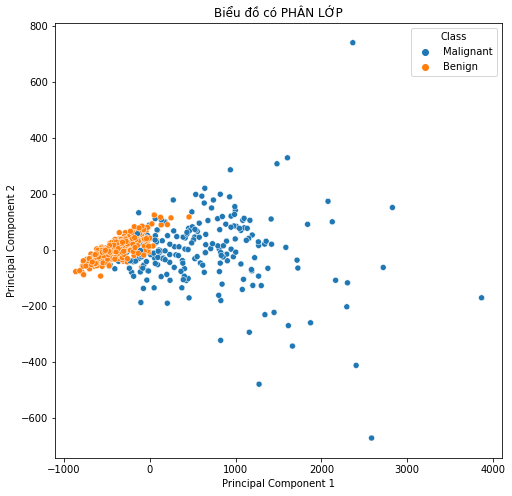

In [6]:
# 2.3) Trực quan hóa dữ liệu với số chiều k = 2.

k   = 2
pca = PCA(k)
pca.fit(data)

PC_name     = ['Principal Component 1', 'Principal Component 2']
B           = pca.transform(data)
principalDf = pd.DataFrame(data = B, columns = PC_name)
finalDf     = pd.concat([principalDf, data_or.Class], axis = 1) # Ghép cột phân lớp (Class) vào ma trận PCA

# Trực quan hóa dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf, hue = "Class", legend = 'full')
plt.show()

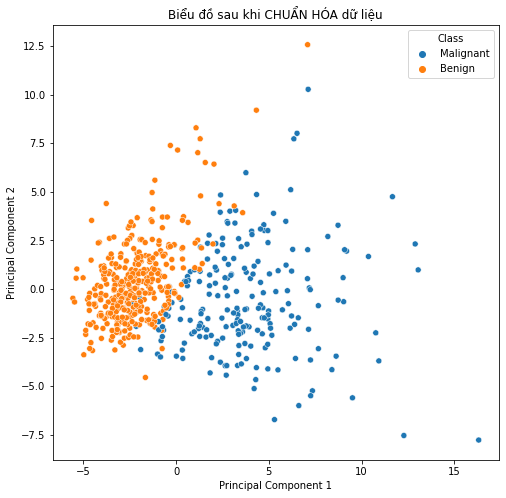

In [7]:
#2.4) Nhận xét kết quả phân lớp. Có thể cải thiện kết quả phân lớp ?
# Nhận xét: Kết quả sự phân cụm của các lớp chưa rõ ràng, có thể cải thiện bằng cách chuẩn hóa dữ liệu trước, sau đó thực hiện PCA

# CHUẨN HÓA dữ liệu, sau đó thực hiện PCA
pca_norm  = PCA(k)
data_norm = StandardScaler().fit_transform(data)
pca_norm.fit(data_norm)

# Transform data
B_norm           = pca_norm.transform(data_norm)
principalDf_norm = pd.DataFrame(data = B_norm, columns = PC_name)
finalDf_norm = pd.concat([principalDf_norm, data_or.Class], axis = 1) # Ghép cột phân lớp (Class) vào ma trận PCA

# Trực quan hóa dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ sau khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf_norm, hue = data_or.Class, legend = 'full')
plt.show()